Библиотека `pandas` активно используется в современном data science для работы с данными, которые могут быть представлены в виде таблиц (а это очень, очень большая часть данных)

`pandas` есть в пакете Anaconda, но если вдруг у Вас её по каким-то причинам нет, то можно установить, раскомментировав одну из следующих команд:

In [ ]:
# !pip3 install pandas
# !conda install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd # Стандартное сокращение для pandas. Всегда используйте его!

# pd.Series

Тип данных pd.Series представляет собой одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

### Создание
Создадим Series из списка температур

In [ ]:
some_list = [1, 3, 5, np.nan, 6, 8]
ser_1 = pd.Series(some_list)
ser_1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
# Так же можно в явном виде указать индексы, чтобы потом было более удобно обращаться к элементам
ind = ['1st day', '2nd day', '3rd day', '4th day', '5rd day', '6th day']

ser_2 = pd.Series(some_list, index=ind)
ser_2

1st day    1.0
2nd day    3.0
3rd day    5.0
4th day    NaN
5rd day    6.0
6th day    8.0
dtype: float64

In [ ]:
ser_2['4th day']

nan

In [ ]:
# А еще можно дать pd.Series имя, чтобы было совсем красиво
ser_3 = pd.Series(some_list, index=ind, name='Temperature')
ser_3

1st day    1.0
2nd day    3.0
3rd day    5.0
4th day    NaN
5rd day    6.0
6th day    8.0
Name: Temperature, dtype: float64

### Индексирование
С индексами можно работать так же, как и в случае с обычным list.

In [ ]:
print(ser_3[0])

print('-----------')

print(ser_3[1:3])

print('-----------')

print(ser_3[::-1])

1.0
-----------
2nd day    3.0
3rd day    5.0
Name: Temperature, dtype: float64
-----------
6th day    8.0
5rd day    6.0
4th day    NaN
3rd day    5.0
2nd day    3.0
1st day    1.0
Name: Temperature, dtype: float64


### Индексирование pd.Series по условиям

In [ ]:
date_range = pd.date_range('20190101', periods=10)
ser_4 = pd.Series(np.random.rand(10), index=date_range)
ser_4

2019-01-01    0.278218
2019-01-02    0.723368
2019-01-03    0.726915
2019-01-04    0.778180
2019-01-05    0.552627
2019-01-06    0.016697
2019-01-07    0.687915
2019-01-08    0.244640
2019-01-09    0.538825
2019-01-10    0.442131
Freq: D, dtype: float64

In [ ]:
ser_4 > 0.5

2019-01-01    False
2019-01-02     True
2019-01-03     True
2019-01-04     True
2019-01-05     True
2019-01-06    False
2019-01-07     True
2019-01-08    False
2019-01-09     True
2019-01-10    False
Freq: D, dtype: bool

В качестве индекса можно указать выражение, и нам будут возвращены только те элементы, для которых значение является `True`

In [ ]:
ser_4[ser_4 > 0.5]

2019-01-02    0.723368
2019-01-03    0.726915
2019-01-04    0.778180
2019-01-05    0.552627
2019-01-07    0.687915
2019-01-09    0.538825
dtype: float64

In [ ]:
ser_4[(ser_4 > 0.6) | (ser_4 < 0.2)]

2019-01-02    0.723368
2019-01-03    0.726915
2019-01-04    0.778180
2019-01-06    0.016697
2019-01-07    0.687915
dtype: float64

In [ ]:
ser_4[(ser_4 > 0.6) & (ser_4 < 0.2)]

Series([], Freq: D, dtype: float64)

### Сортировки
Тип `pd.Series` можно отсортировать как по значениям, так и по индексу.

In [ ]:
ser_4.sort_index()

2019-01-01    0.278218
2019-01-02    0.723368
2019-01-03    0.726915
2019-01-04    0.778180
2019-01-05    0.552627
2019-01-06    0.016697
2019-01-07    0.687915
2019-01-08    0.244640
2019-01-09    0.538825
2019-01-10    0.442131
Freq: D, dtype: float64

In [ ]:
ser_4 = ser_4.sort_values()

In [ ]:
ser_4

2019-01-06    0.016697
2019-01-08    0.244640
2019-01-01    0.278218
2019-01-10    0.442131
2019-01-09    0.538825
2019-01-05    0.552627
2019-01-07    0.687915
2019-01-02    0.723368
2019-01-03    0.726915
2019-01-04    0.778180
dtype: float64

### Операции с series
Тип `pd.Series` можно модифицировать проще, чем стандартный ``list`` из Python.

In [ ]:
ser_4 + 100

2019-01-06    100.016697
2019-01-08    100.244640
2019-01-01    100.278218
2019-01-10    100.442131
2019-01-09    100.538825
2019-01-05    100.552627
2019-01-07    100.687915
2019-01-02    100.723368
2019-01-03    100.726915
2019-01-04    100.778180
dtype: float64

In [ ]:
np.exp(ser_4)

2019-01-06    1.016837
2019-01-08    1.277161
2019-01-01    1.320774
2019-01-10    1.556020
2019-01-09    1.713993
2019-01-05    1.737811
2019-01-07    1.989562
2019-01-02    2.061364
2019-01-03    2.068689
2019-01-04    2.177506
dtype: float64

In [ ]:
term_1 = pd.Series(np.random.randint(0, 10, 5))
term_2 = pd.Series(np.random.randint(0, 10, 6))

term_1 + term_2

0     2.0
1    15.0
2     9.0
3    16.0
4     8.0
5     NaN
dtype: float64

In [ ]:
term_1.shape

(5,)

# pd.DataFrame

Тип данных pd.DataFrame представляет собой двумерную таблицу с данными. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.
### Создание и основные объекты

In [ ]:
# Dataframe можно составить из словаря. Ключ будет соответсовать колонке
some_dict = {'one': pd.Series([1,2,3], index=['a','b','c']),
             'two': pd.Series([1,2,3,4], index=['a','b','c','d']),
             'three': pd.Series([5,6,7,8], index=['a','b','c','d'])}
df = pd.DataFrame(some_dict)
df

,one,two,three
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


In [ ]:
#Альтернативно, из списка списков с аргументом columns

some_array = [[1,1,5], [2,2,6], [3,3,7], [np.nan, 4,8]]
df = pd.DataFrame(some_array, index=['a', 'b', 'c', 'd'], columns=['one', 'two', 'three'])
df

,one,two,three
a,1.0,1,5
b,2.0,2,6
c,3.0,3,7
d,NaN,4,8


In [ ]:
df.values

array([[ 1.,  1.,  5.],
       [ 2.,  2.,  6.],
       [ 3.,  3.,  7.],
       [nan,  4.,  8.]])

In [ ]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

In [ ]:
df.columns = ['first_column', 'second_column', 'third_column']
df.index = [1,2,3,4]
df

,first_column,second_column,third_column
1,1.0,1,5
2,2.0,2,6
3,3.0,3,7
4,NaN,4,8


### Индексирование 
Есть очень много способов индексировать DataFrame в Pandas. Не все из них хорошие! Вот несколько удобных, но не универсальных.

#### По колонкам
Индексирование по колонке возращает pd.Series. Можно выбирать не одну колонку, а сразу несколько. Тогда снова вернётся pd.DataFrame.

In [ ]:
first_column = df['first_column']
first_column

1    1.0
2    2.0
3    3.0
4    NaN
Name: first_column, dtype: float64

In [ ]:
df.first_column

1    1.0
2    2.0
3    3.0
4    NaN
Name: first_column, dtype: float64

In [ ]:
subset_dataframe = df[['first_column', 'second_column']]
subset_dataframe

,first_column,second_column
1,1.0,1
2,2.0,2
3,3.0,3
4,NaN,4


In [ ]:
one_column_dataframe = df[['first_column']]
one_column_dataframe

,first_column
1,1.0
2,2.0
3,3.0
4,NaN


#### По строкам
Можно писать любые слайсы, как в Python-списке. Они будут применяться к строкам. Нельзя обращаться по элементу!

In [ ]:
df[1] # не сработает

KeyError: ignored

In [ ]:
df[:1]

,first_column,second_column,third_column
1,1.0,1,5


In [ ]:
df[1:4]

,first_column,second_column,third_column
2,2.0,2,6
3,3.0,3,7
4,NaN,4,8


#### Универсальное индексирование: .loc и .iloc

.loc и .iloc --- это два взаимозаменяемых атрибута, которые позволяют индексировать по обеим осям сразу. Путаницы не возникает из-за фиксированного порядка перечисления осей.

In [ ]:
# По индексам: 
df.iloc[1:3, :2]

,first_column,second_column
2,2.0,2
3,3.0,3


In [ ]:
df.loc[1:3, ['first_column', 'second_column']]

,first_column,second_column
1,1.0,1
2,2.0,2
3,3.0,3


Лучше использовать по умолчанию либо только loc, либо только .iloc! А лучше вообще всегда только .iloc, чтобы не запутаться.

### Модификации датасета, создание новых колонок
Можно просто брать и создавать новую колонку. Синтаксис тут вполне естественный.

In [ ]:
new_column = [5,2,1,4]
df['new_column'] = new_column
df

,first_column,second_column,third_column,new_column
1,1.0,1,5,5
2,2.0,2,6,2
3,3.0,3,7,1
4,NaN,4,8,4


Аналогично, можно применять к отдельным колонкам арифметические операции (ведь колонки --- это Series!)

In [ ]:
df['first_column'] = df['first_column'] * 10
df

,first_column,second_column,third_column,new_column
1,10.0,1,5,5
2,20.0,2,6,2
3,30.0,3,7,1
4,NaN,4,8,4


## Реальный датасет
Мы будем работать с датасетом ``Титаник``. Файлы необходимо скачать локально или загрузить с помощью функции ниже.
![alt text](https://drive.google.com/uc?id=1Tb52nFFsjI8sqv0AlMpx25aNJ62xzp5w)

Информация о файлах: 
 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)


### Чтение из файла
Обычно данные хранятся в виде таблиц в файлах формата .csv или .xlsx. На этом семинаре мы будем загружать данные из .csv файлов.


 
Загрузим первый файл

In [ ]:
# df_1 = pd.read_csv('titanic_data.csv')
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1'
titanic_passengers = pd.read_csv(pass_link, index_col='PassengerId') # index_col=?

In [ ]:
print('Всего пассажиров: ', len(titanic_passengers))
titanic_passengers.head(10)

Всего пассажиров:  891


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### Разная информация о датасете

Можно узнать размер таблицы, информацию о значениях таблицы, различные статистики по значениям.

# Практика


## Задание 1 
Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало в каждом классе? Какой средний/минимальный/максимальный возраст пассажиров?

In [ ]:
# процент мужчин и женщин
titanic_passengers['Sex'].value_counts(normalize=True) * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [ ]:
# количество пассажиров в каждом классе
titanic_passengers['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# средний/максимальный/минимальный возраст пассажиров
titanic_passengers['Age'].describe().loc[['mean', 'max', 'min']]

mean    29.699118
max     80.000000
min      0.420000
Name: Age, dtype: float64

## Задание 2
Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Используйте метод ``pandas.DataFrame.groupby``.

In [ ]:
titanic_passengers.groupby('Pclass').mean()['Age']

<ipython-input-46-d0ce7da28c65>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic_passengers.groupby('Pclass').mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

## Слияние таблиц
Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется ``pd.join``.

In [ ]:
# df_2 = pd.read_csv('titanic_surv.csv')
surv_link = 'https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1'
df_2 = pd.read_csv(surv_link)

In [ ]:
df_2.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Задание 3.
Слейте два датасета по колонке индекса.

In [ ]:
df_3 = df_2.join(titanic_passengers)
df_3

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4,0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3.0,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5.0,382652,29.1250,NaN,Q
887,1,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S
888,0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S
889,1,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S


### Задание 4. 
Сколько всего выживших пассажиров? Выживших пассажиров по каждому из полов? Постройте матрицу корреляций факта выживания, пола и возраста.

In [ ]:
df_3['Survived'].sum()

342

In [ ]:
df_3[df_3['Survived'] == 1]['Sex'].value_counts()

male      221
female    121
Name: Sex, dtype: int64

In [ ]:
def func(x):
  return 1 if x == 'male' else 0

In [ ]:
df_3['Isex'] = df_3['Sex'].apply(func)

In [ ]:
df_3['Isex']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    1
888    0
889    0
890    1
Name: Isex, Length: 891, dtype: int64

In [ ]:
import seaborn as sns

<ipython-input-62-1290cdccff18>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_3.corr().loc[['Survived', 'Age', 'Isex'], ['Survived', 'Age', 'Isex']])


<Axes: >

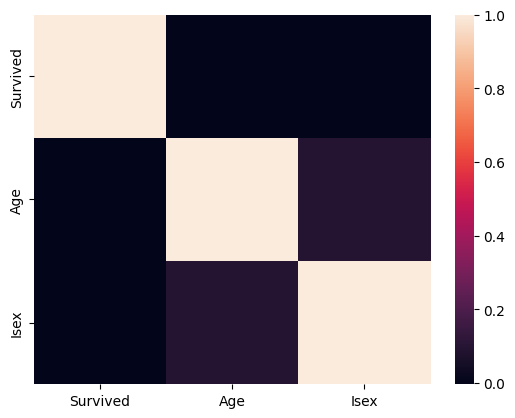

In [ ]:
sns.heatmap(df_3.corr().loc[['Survived', 'Age', 'Isex'], ['Survived', 'Age', 'Isex']])